<a href="https://colab.research.google.com/github/jbsher/capstone/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brody Sherwood

## Capstone: Hagrid Hand Gesture Recognition

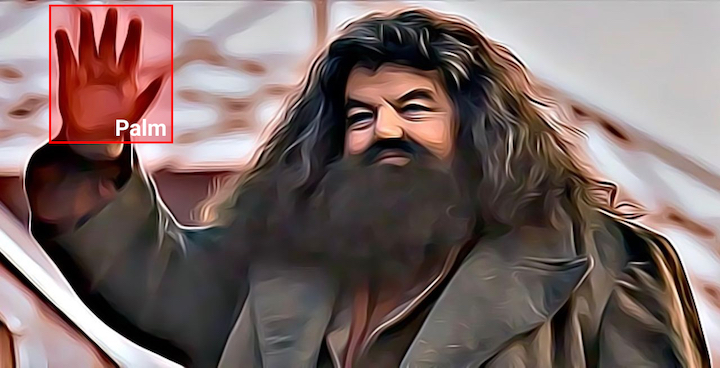

Imports

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import torchvision.transforms as transforms
from PIL import Image
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split



In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
class_names = [
   'call',
   'dislike',
   'fist',
   'four',
   'like',
   'mute',
   'ok',
   'one',
   'palm',
   'peace_inverted',
   'peace',
   'rock',
   'stop_inverted',
   'stop',
   'three',
   'three2',
   'two_up',
   'two_up_inverted',]

formats = (".jpeg", ".jpg", ".jp2", ".png", ".tiff", ".jfif", ".bmp", ".webp", ".heic")

Read in

In [ ]:
# Path to training data
path_to_train_data = "/content/drive/MyDrive/capstone/data/archive/train"
path_to_test_data = "/content/drive/MyDrive/capstone/data/archive/test"

def preprocess_image(img):
    # Resize the image
    img = cv2.resize(img, (128, 128))

    # Convert datatype and normalize the pixel values to [-1, 1]
    img = img.astype('float32')
    img = (img / 255.0 - 0.5) * 2

    return img

In [27]:
# Create a new Sequence class
class HagridGestureDataset(Sequence):
    def __init__(self, path_to_data, batch_size=32, shuffle=True):
        self.data = ... # Load data logic here
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.data))
        self.on_epoch_end()

    def __len__(self):
        return math.ceil(len(self.data) / self.batch_size)

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        X = []
        y = []

        for idx in batch_indexes:
            img, label = self.data[idx]
            img = preprocess_image(img)
            X.append(img)
            y.append(label)

        X = np.array(X)
        y = np.array(y)

        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

train_dataset = HagridGestureDataset(path_to_train_data)
test_dataset = HagridGestureDataset(path_to_test_data)


Look at some images from each class

In [38]:
# Show 2 of each image
def show_images(dataset, num_each=2):
    shown_labels_count = {label: 0 for label in class_names}
    plt.figure(figsize=(15, 5))
    idx = 1

    for i in range(len(dataset)):
        image, label = dataset[i]

        if shown_labels_count[label] < num_each:
            plt.subplot(2, len(class_names), idx)
            plt.imshow(image)
            plt.title(class_names[label])
            plt.axis("off")

            shown_labels_count[label] += 1
            idx += 1

        # Check if we've shown the required number for each class
        if all(count >= num_each for count in shown_labels_count.values()):
            break

    plt.tight_layout()
    plt.show()


In [25]:
show_images(train_dataset)

FileNotFoundError: ignored

<Figure size 1500x500 with 0 Axes>

In [16]:
# Create seperate sequence for "seperation of concerns". The Sequence class allows us to load data in chunks for memory efficiency.
class HagridGestureDataSequence(Sequence):
    def __init__(self, x_set, y_set, batch_size=32, shuffle=True):
        self.x = x_set
        self.y = y_set
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.x))
        self.on_epoch_end()

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, index):
        # Generate indexes of the batch
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        X = [self.x[i] for i in batch_indexes]
        y = [self.y[i] for i in batch_indexes]

        X = np.array([img_to_array(img) / 255.0 for img in X])
        y = np_utils.to_categorical(y, len(class_names))

        return np.array(X), np.array(y)


Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

batch_size = 32
train_sequence = HagridGestureDataSequence(x_train, y_train, batch_size=batch_size)
test_sequence = HagridGestureDataSequence(x_test, y_test, batch_size=batch_size, shuffle=False)

